This script tries to classify 26 alphabet sign classes + 3 word classes (SPACE, DELETE and NOTHING). The used dataset is the one below:

https://www.kaggle.com/datasets/grassknoted/asl-alphabet

An accuracy of 90% is reached using AlexNet style architecture

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#Use the train dataset split in two subset because of sake of semplicity 
#split ratio 95% TRAIN, 5% validation

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0,
    validation_split=0.05)

data_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(75,75), 
    batch_size=1024,
    class_mode='categorical',
    shuffle=True,
    subset='training')

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(75,75),
    batch_size=256,
    class_mode='categorical',
    shuffle=True,
    subset='validation')

Found 82650 images belonging to 29 classes.
Found 4350 images belonging to 29 classes.


In [3]:
#classifier is a softmax
x01 = tf.keras.layers.Input(shape=(75,75,3))
x02 = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_normal')(x01)
x03 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x02)
b00 = tf.keras.layers.BatchNormalization()(x03)
x04 = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='he_normal')(b00)
x05 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x04)
b01 = tf.keras.layers.BatchNormalization()(x05)
x06 = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu', kernel_initializer='he_normal')(b01)
x07 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x06)
b02 = tf.keras.layers.BatchNormalization()(x07)
x08 = tf.keras.layers.Flatten()(b02)
x09 = tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_normal')(x08)
b03 = tf.keras.layers.BatchNormalization()(x09)
x10 = tf.keras.layers.Dense(29, activation='softmax', kernel_initializer='he_normal')(b03)
model = tf.keras.Model(inputs=x01, outputs=x10)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 75, 75, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 37, 37, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 256)      0     

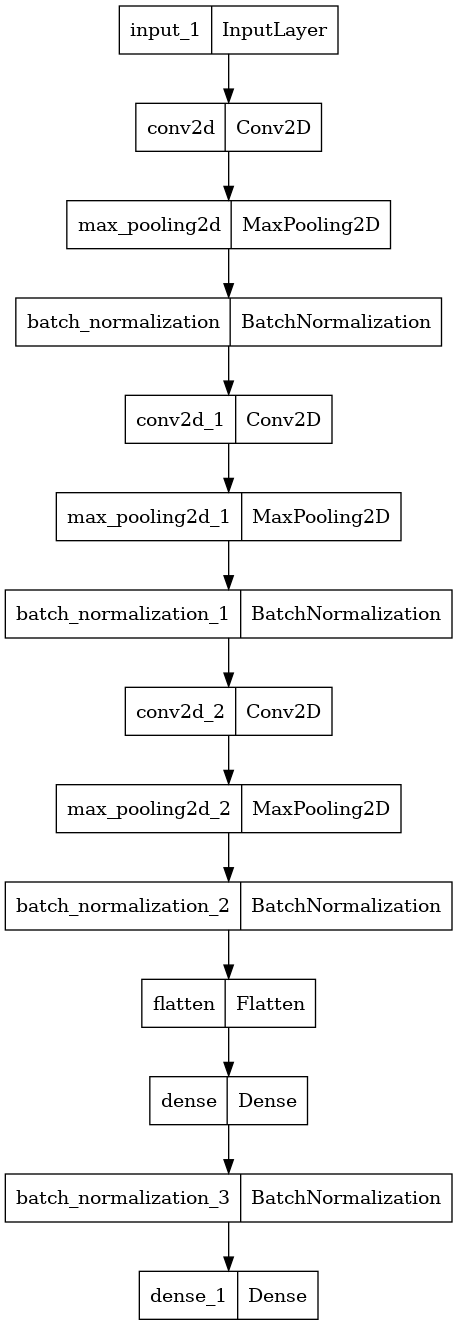

In [5]:
tf.keras.utils.plot_model(model)

In [6]:
#define weights/bias optimizer and chose metric
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
#train the model
epochs_len = 20
history = model.fit(
    train_generator,
    epochs=epochs_len,
    batch_size=32,
    verbose=1,
    validation_data=val_generator)

Epoch 1/20
81/81 [==============================] - 443s 5s/step - loss: 1.2859 - accuracy: 0.6641 - val_loss: 3.9366 - val_accuracy: 0.0379
Epoch 2/20
81/81 [==============================] - 123s 2s/step - loss: 0.3458 - accuracy: 0.9379 - val_loss: 4.6156 - val_accuracy: 0.0490
Epoch 3/20
81/81 [==============================] - 120s 1s/step - loss: 0.1784 - accuracy: 0.9789 - val_loss: 4.2135 - val_accuracy: 0.1166
Epoch 4/20
81/81 [==============================] - 125s 2s/step - loss: 0.1091 - accuracy: 0.9917 - val_loss: 2.9375 - val_accuracy: 0.2821
Epoch 5/20
81/81 [==============================] - 125s 2s/step - loss: 0.0746 - accuracy: 0.9968 - val_loss: 1.6279 - val_accuracy: 0.5129
Epoch 6/20
81/81 [==============================] - 119s 1s/step - loss: 0.0561 - accuracy: 0.9982 - val_loss: 0.9216 - val_accuracy: 0.7120
Epoch 7/20
81/81 [==============================] - 119s 1s/step - loss: 0.0432 - accuracy: 0.9994 - val_loss: 0.6142 - val_accuracy: 0.8166
Epoch 8/20
81

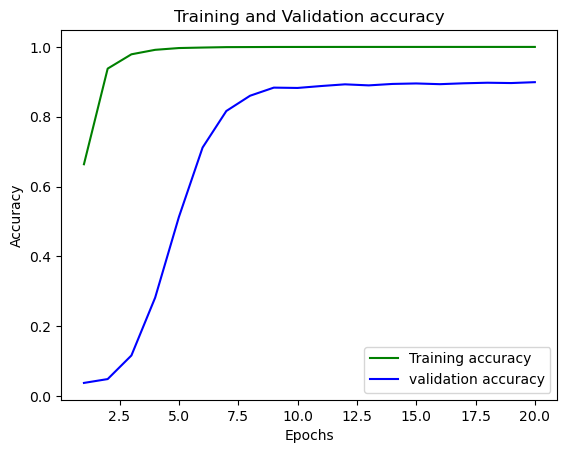

In [8]:
#debug plot
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1,history.epoch[-1]+2)
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

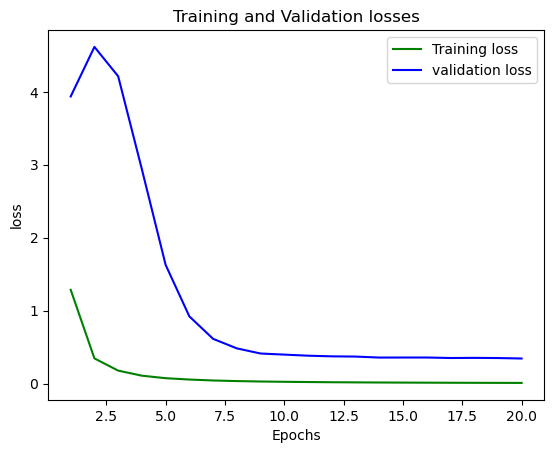

In [9]:
#debug plot
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()